# <b> Project Title: Zomato Restaurant Clustering and Sentiment Analysis

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

**Zomato Restaurant names and Metadata**

Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

**Zomato Restaurant reviews**

Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

**Connecting the drive**

In [1]:
#importing and connecting to the drive storage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing libraries**

In [2]:
#importing libraries
import string
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import missingno as msno
from datetime import date, datetime
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Data Loading**

**Restaurent reviews dataframe**

In [3]:
#loading the restaurant reviews dataset
reviews_df = pd.read_csv('/content/drive/MyDrive/zomato/Zomato Restaurant reviews.csv')
print('Restaurent reviews dataframe:')
reviews_df.head()

Restaurent reviews dataframe:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [4]:
#shape and size of dataset
reviews_df.shape

(10000, 7)

In [5]:
#columns in the reviews dataset
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


# **Data Cleaning**

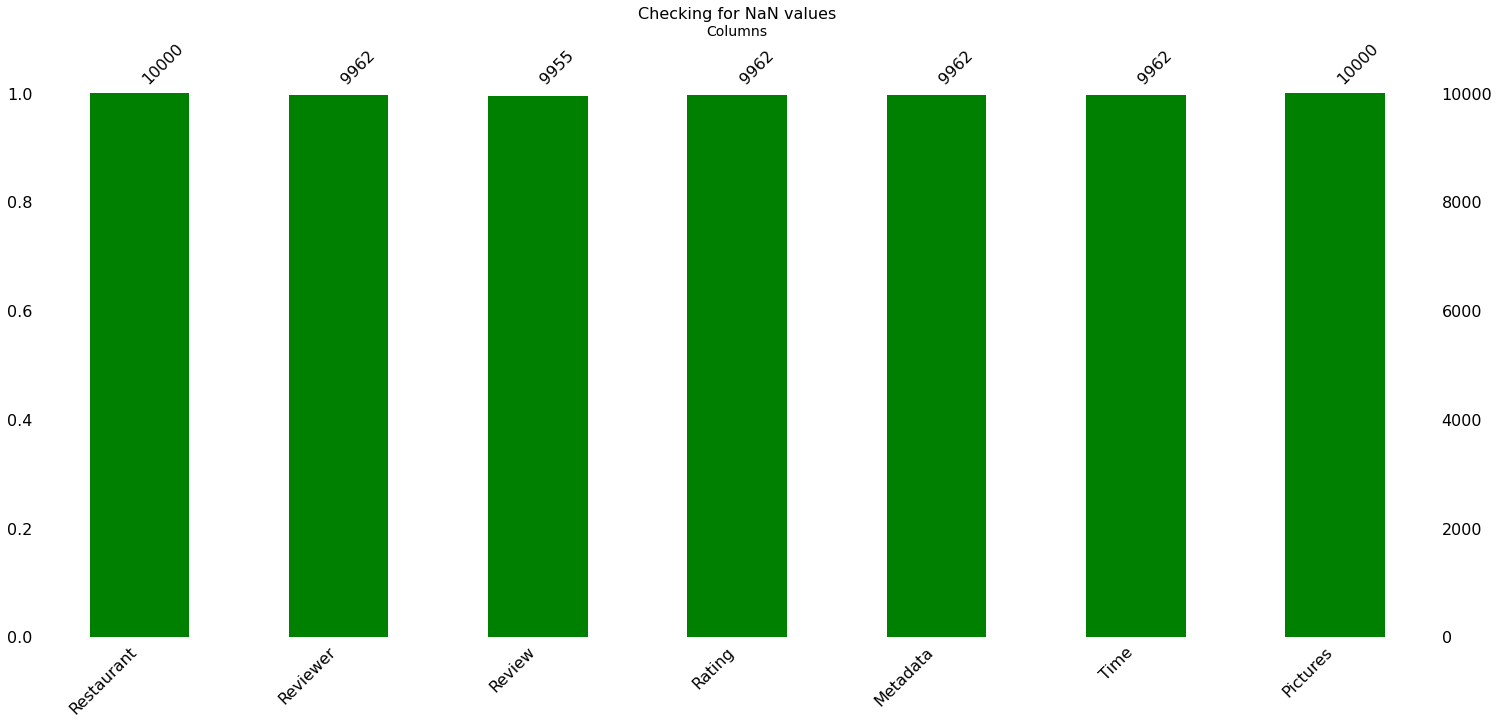

In [7]:
#checking for null values
msno.bar(reviews_df, color='green')
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

* Reviewer, Review, Rating, Metadata and Time are the features having the NaN values

In [8]:
#dropping the null values
reviews_df.dropna(inplace=True)

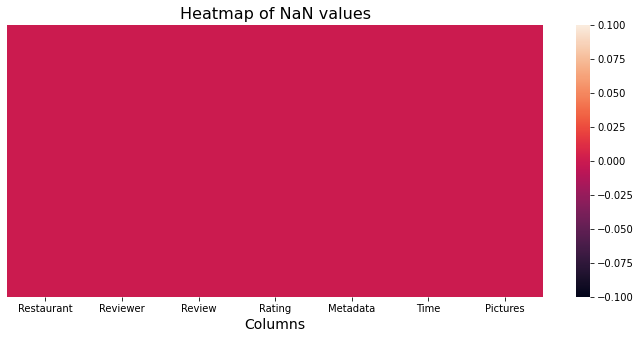

In [9]:
#heatmap of data frame
plt.figure(figsize=(12, 5))
sns.heatmap(reviews_df.isnull(), yticklabels=False)
plt.title('Heatmap of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

# **Data Visualization**

In [10]:
#number of unique values in reviews dataset
reviews_df.nunique()

Restaurant     100
Reviewer      7442
Review        9364
Rating          10
Metadata      2477
Time          9775
Pictures        36
dtype: int64

**Restaurant Ratings**

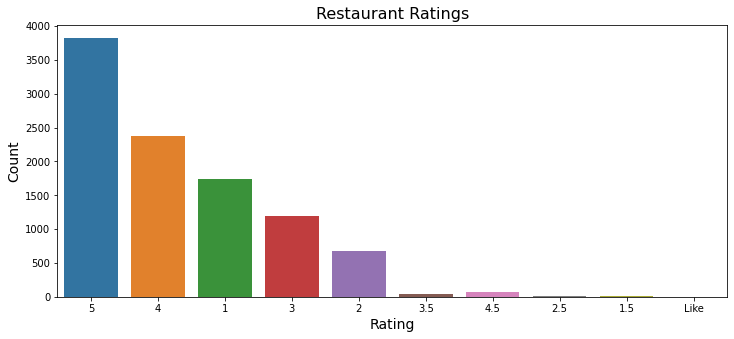

In [11]:
#plotting the value counts of Restaurant ratings
plt.figure(figsize=(12, 5))
sns.countplot(reviews_df.Rating)
plt.title('Restaurant Ratings', size=16)
plt.xlabel('Rating', size=14)
plt.ylabel('Count', size=14)
plt.show()

In [12]:
#removing the chategorical data
reviews_df = reviews_df[reviews_df['Rating']!='Like']

In [13]:
#converting the rating datatype to numerical values
reviews_df['Rating'] = reviews_df['Rating'].astype(float)

In [14]:
#information of dataframe after the conversion
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Metadata    9954 non-null   object 
 5   Time        9954 non-null   object 
 6   Pictures    9954 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.1+ KB


<b> Analysis of Metadata

In [15]:
#converting the datatype of metadata
reviews_df['Metadata'] = reviews_df['Metadata'].astype(str)

In [16]:
#first 5 rows of dataframe after data cleaning 
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [17]:
#separating the data contained in the metadata column
reviews_df['Reviewrs'], reviews_df['Followers'] = reviews_df['Metadata'].str.split(',').str

In [18]:
#separating the numerical data contained in columns
reviews_df['Reviewrs'] = pd.to_numeric(reviews_df['Reviewrs'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])

In [19]:
#dropping the column
reviews_df.drop('Metadata', axis=1, inplace=True)
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviewrs,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2.0


In [20]:
#changing the datetime format
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])

In [21]:
#inserting new columns after converssion of format
reviews_df['Date'] = reviews_df['Time'].dt.day
reviews_df['Month'] = reviews_df['Time'].dt.month
reviews_df['Year'] = reviews_df['Time'].dt.year
reviews_df['Day'] = reviews_df['Time'].dt.day_name()
reviews_df['Hour'] = reviews_df['Time'].dt.hour

In [22]:
#dataframe after inserssion of columns
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviewrs,Followers,Date,Month,Year,Day,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,25,5,2019,Saturday,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,25,5,2019,Saturday,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,24,5,2019,Friday,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,24,5,2019,Friday,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,24,5,2019,Friday,21


In [23]:
#dropping the datetime column
reviews_df.drop('Time', axis=1, inplace=True)
#checking for unique values in year feature
reviews_df['Year'].unique()

array([2019, 2018, 2017, 2016])

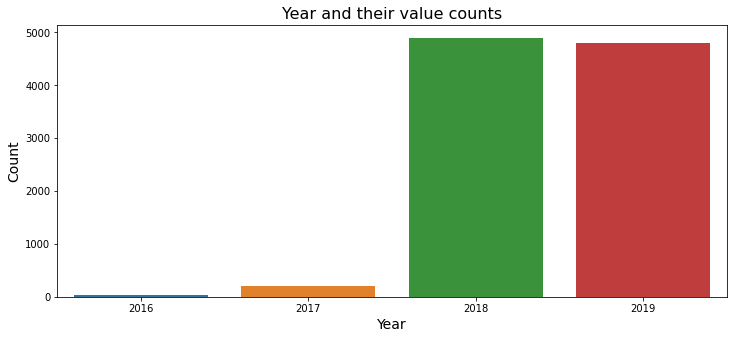

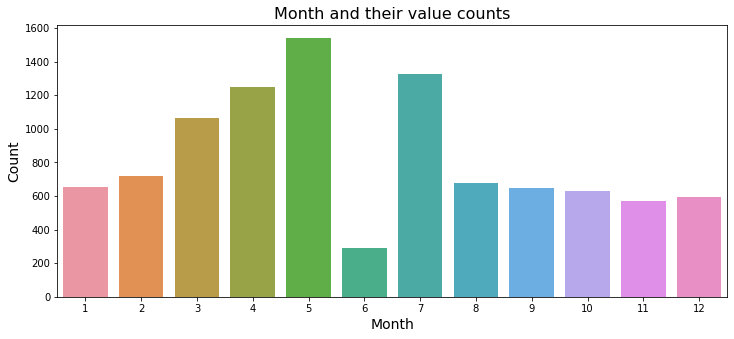

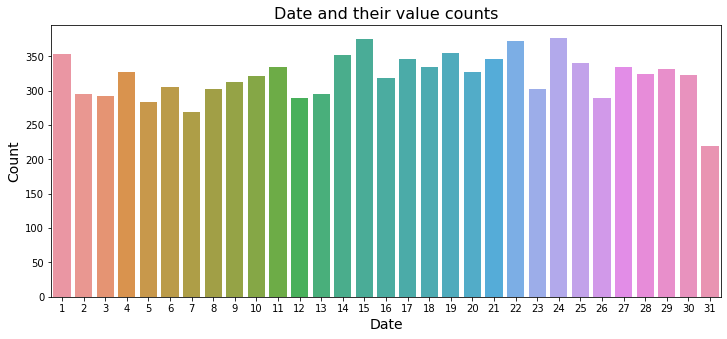

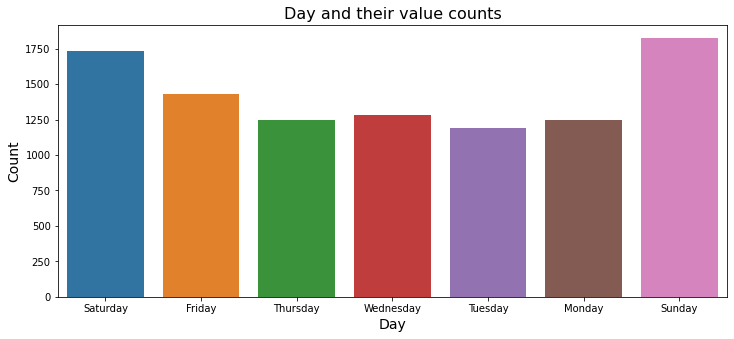

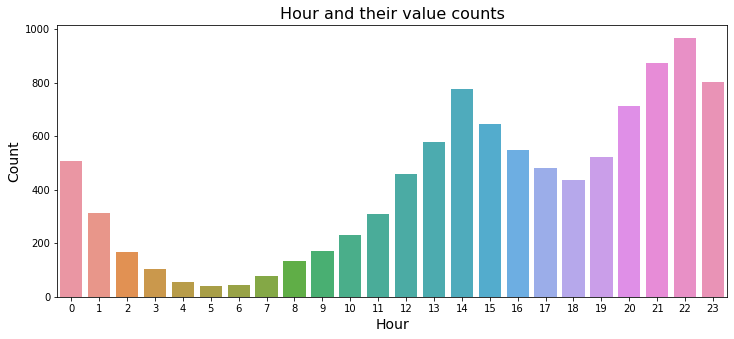

In [24]:
#creating a list of new features
features = ['Year', 'Month', 'Date', 'Day', 'Hour']

#plotting of value counts of the features
for col in features:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.countplot(reviews_df[col], ax=ax)
    plt.title(f'{col} and their value counts', size=16)
    plt.xlabel(col, size=14)
    plt.ylabel('Count', size=14)
    plt.show()

In [25]:
#fuction for finding the type of time
def time_type(time):
    if(time==4 or time==5 or time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
        return 'Morning'
    elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
        return 'Noon'
    elif(time==16 or time==18 or time==19 or time==20):
        return 'Evening'
    else:
        return 'Night'

In [26]:
#applying the framed function on the data
reviews_df['Time type'] = reviews_df['Hour'].apply(time_type)

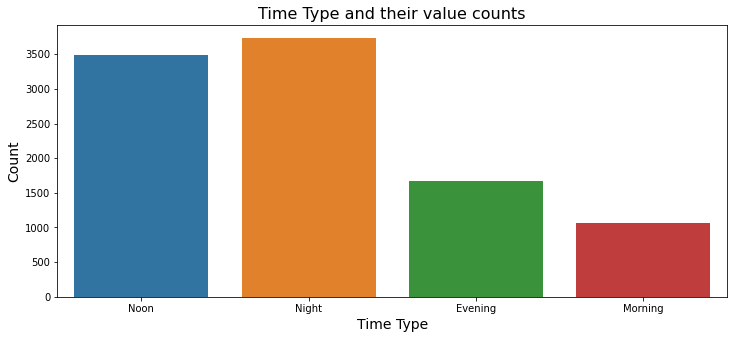

In [27]:
#plotting the time type data
plt.figure(figsize=(12, 5))
sns.countplot(reviews_df['Time type'])
plt.title('Time Type and their value counts', size=16)
plt.xlabel('Time Type', size=14)
plt.ylabel('Count', size=14)
plt.show()

**Restaurants and Ratings**

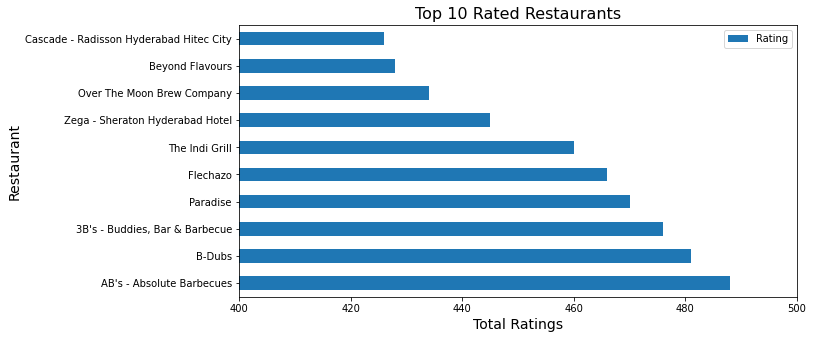

In [28]:
#data of restaurants
top_restaurants = reviews_df.groupby('Restaurant').agg({'Rating':'sum'}).sort_values(by='Rating',ascending=False)
#top 10 restaurants
top_10 = top_restaurants[:10]
#plotting the data of top 10 restaurants
top_10.plot(kind='barh', xlim=(400, 500), figsize=(10, 5))
plt.title('Top 10 Rated Restaurants', size=16)
plt.ylabel('Restaurant', size=14)
plt.xlabel('Total Ratings', size=14)
plt.show()

In [29]:
#checking the shape for middle records of features
top_restaurants.shape

(100, 1)

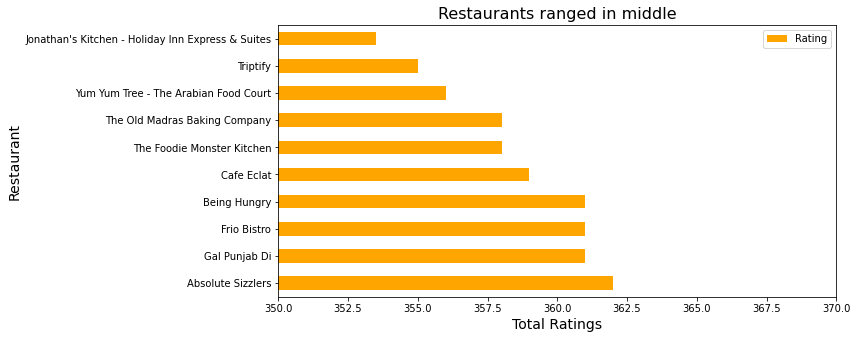

In [30]:
#restaurants ranges in middle
avg_rated = top_restaurants[45:55]
avg_rated.plot(kind='barh', xlim=(350, 370), figsize=(10, 5), color='orange')
plt.title('Restaurants ranged in middle', size=16)
plt.ylabel('Restaurant', size=14)
plt.xlabel('Total Ratings', size=14)
plt.show()

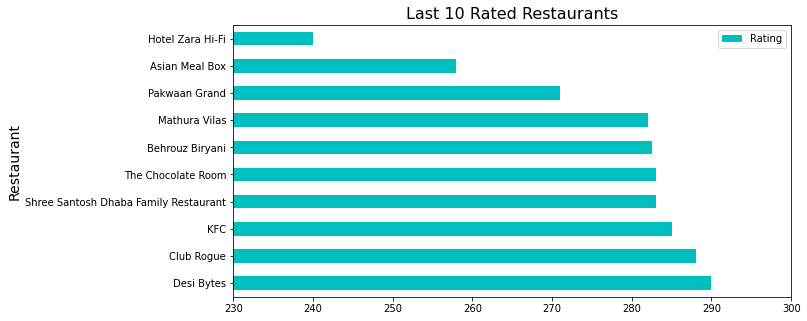

In [31]:
#least 10 restaurants
last_10 = top_restaurants[-10:]
last_10.plot(kind='barh', xlim=(230, 300), figsize=(10, 5), color='c')
plt.title('Last 10 Rated Restaurants', size=16)
plt.ylabel('Restaurant', size=14)
plt.show()

**Restaurants and Followers**

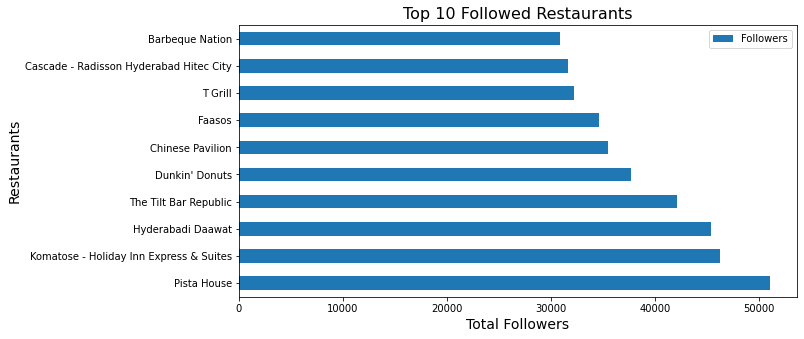

In [32]:
#data of restaurants
followed_restaurants = reviews_df.groupby('Restaurant').agg({'Followers':'sum'}).sort_values(by='Followers',ascending=False)
#top 10 restaurants
top_10 = followed_restaurants[:10]
top_10.plot(kind='barh',  figsize=(10, 5))
plt.title('Top 10 Followed Restaurants', size=16)
plt.ylabel('Restaurants', size=14)
plt.xlabel('Total Followers', size=14)
plt.show()

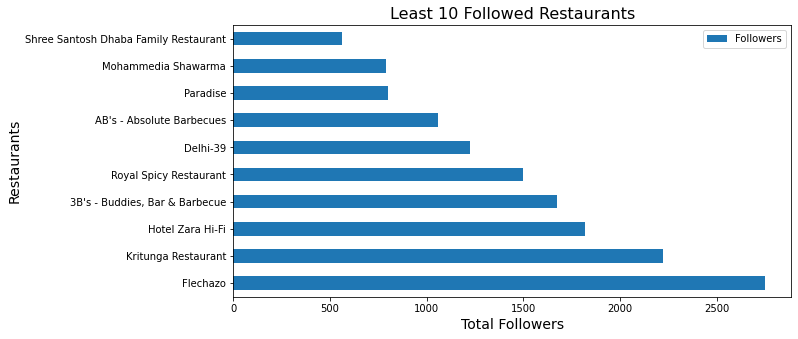

In [33]:
#plotting last 10 records
least_10 = followed_restaurants[-10:]
least_10.plot(kind='barh',  figsize=(10, 5))
plt.title('Least 10 Followed Restaurants', size=16, )
plt.ylabel('Restaurants', size=14)
plt.xlabel('Total Followers', size=14)
plt.show()

**Restaurants and Pictures Posted**

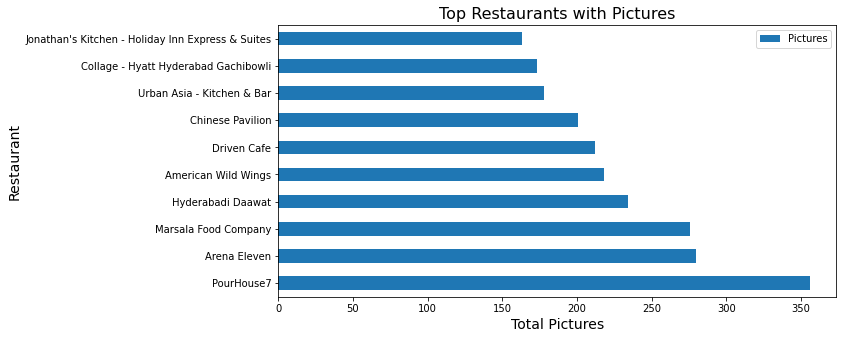

In [34]:
#data of restaurants with pictures posted in reviews
pic_restaurants = reviews_df.groupby('Restaurant').agg({'Pictures':'sum'}).sort_values(by='Pictures',ascending=False)
#top 10 restaurants
top = pic_restaurants.head(10)
#plotting the data of top 10 restaurants
top.plot(kind='barh', figsize=(10, 5))
plt.title('Top Restaurants with Pictures', size=16)
plt.ylabel('Restaurant', size=14)
plt.xlabel('Total Pictures', size=14)
plt.show()

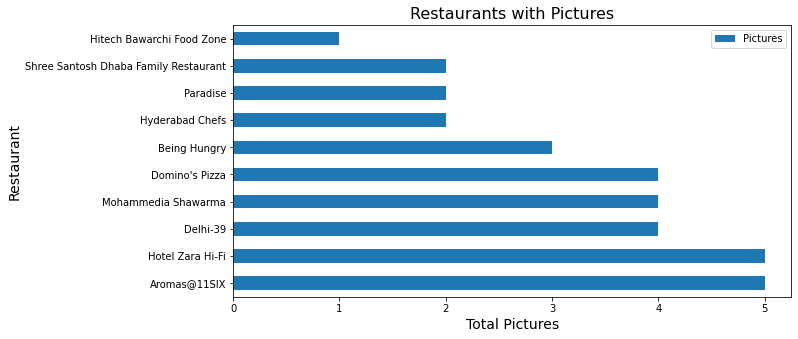

In [35]:
#last 10 records
least = pic_restaurants.tail(10)
#plotting the data of least 10 restaurants
least.plot(kind='barh', figsize=(10, 5))
plt.title('Restaurants with Pictures', size=16)
plt.ylabel('Restaurant', size=14)
plt.xlabel('Total Pictures', size=14)
plt.show()

**Reviewers and Followers**

In [36]:
#finding the total number of reviewrs and followers
ratings = reviews_df.groupby('Rating').agg({'Reviewrs':sum, 'Followers':sum})
ratings

,Reviewrs,Followers
Rating,,
1.0,13165,84228.0
1.5,457,3381.0
2.0,15234,99521.0
2.5,985,4997.0
3.0,47320,276104.0
3.5,5289,25045.0
4.0,101115,679406.0
4.5,4067,34892.0
5.0,51343,416146.0


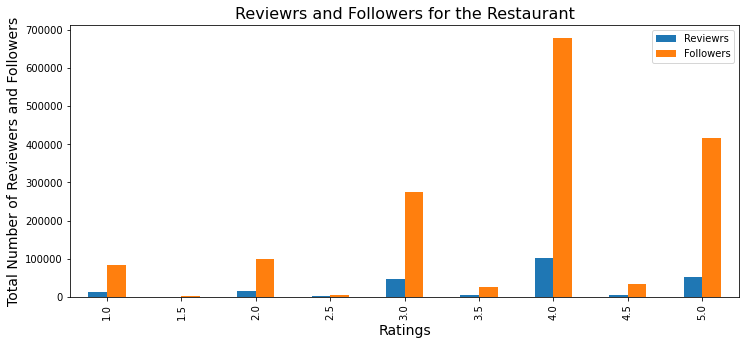

In [37]:
#plotting the data of ratings
ratings.plot(kind='bar', figsize=(12, 5))
plt.title('Reviewrs and Followers for the Restaurant', size=16)
plt.xlabel('Ratings', size=14)
plt.ylabel('Total Number of Reviewers and Followers', size=14)
plt.show()

**Reviewers**

In [38]:
#gathering the data of reviewers
top_reviewers = reviews_df.groupby('Reviewer').agg({'Rating':'sum'}).sort_values(by='Rating',ascending=False)
top_10 = top_reviewers[:10]
top_10

,Rating
Reviewer,
Kiran,54.0
Ankita,51.0
Vedant Killa,44.0
Kumar,42.0
Parijat Ray,41.5
Jay Mehta,41.0
Sravani,40.0
Prachita Jayaswal,39.0
Aman Agarwal,38.0


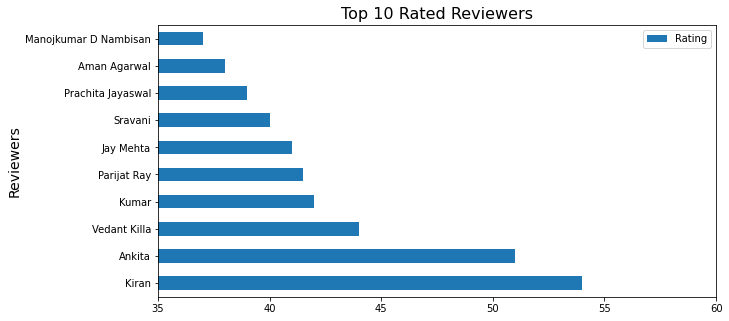

In [39]:
#plotting the data of top reviewers
top_10.plot(kind='barh', xlim=(35, 60), figsize=(10, 5))
plt.title('Top 10 Rated Reviewers', size=16)
plt.ylabel('Reviewers', size=14)
plt.show()

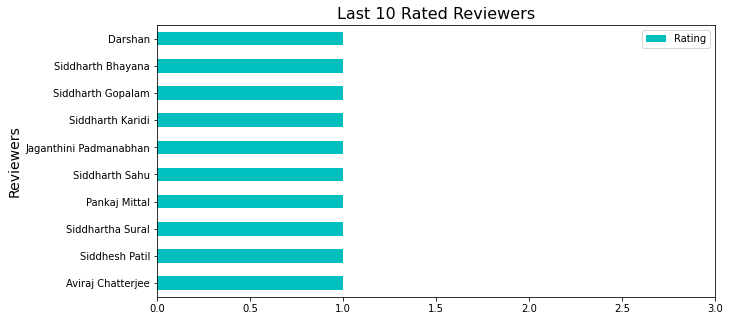

In [40]:
#least reviewers
last_10 = top_reviewers[-10:]
last_10.plot(kind='barh', xlim=(0, 3), figsize=(10, 5), color='c')
plt.title('Last 10 Rated Reviewers', size=16)
plt.ylabel('Reviewers', size=14)
plt.show()

In [41]:
#defining the stopwords
stopwords = nltk.corpus.stopwords

#defining the preprocessing
def txt_processing(text):
    #removing the punctuations
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = "".join(no_punc)
    #removing stopwords
    return " ".join([word for word in no_punc.split() if word.lower not in stopwords.words('english')])

In [42]:
#applying the text preprocessing fuction
reviews_df['Review'] = reviews_df['Review'].apply(lambda text: txt_processing(text))
#top 10 records after processing
reviews_df['Review'].head(10)

0    The ambience was good food was quite good had ...
1    Ambience is too good for a pleasant evening Se...
2    A must try great food great ambience Thnx for ...
3    Soumen das and Arun was a great guy Only becau...
4    Food is goodwe ordered Kodi drumsticks and bas...
5    Ambiance is good service is good food is aPrad...
6    Its a very nice place ambience is different al...
7    Well after reading so many reviews finally vis...
8    Excellent food specially if you like spicy foo...
9    Came for the birthday treat of a close friend ...
Name: Review, dtype: object

In [43]:
#dictionary of reviews
reviews_dict = {}
for word in reviews_df['Review']:
    for char in word.split(', '):
        if char in reviews_dict:
            reviews_dict[char] = reviews_dict[char]+1
        else:
            reviews_dict[char] = 1

In [44]:
#dataframe of words in the reviews
review_df = pd.DataFrame(reviews_dict.items(), columns=['Review', 'Count']).sort_values('Count', ascending=False)
#first 5 records of the dataframe
review_df.head()

,Review,Count
785,good,239
1566,Good,50
1581,nice,30
1900,very good,23
791,excellent,20


**Restaurant Names Data Frame**

In [45]:
#loading the zomato restaurant dataset 
names_df = pd.read_csv('/content/drive/MyDrive/zomato/Zomato Restaurant names and Metadata.csv')
print('Restaurent names dataframe:')
names_df.head()

Restaurent names dataframe:


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


**Data Cleaning**

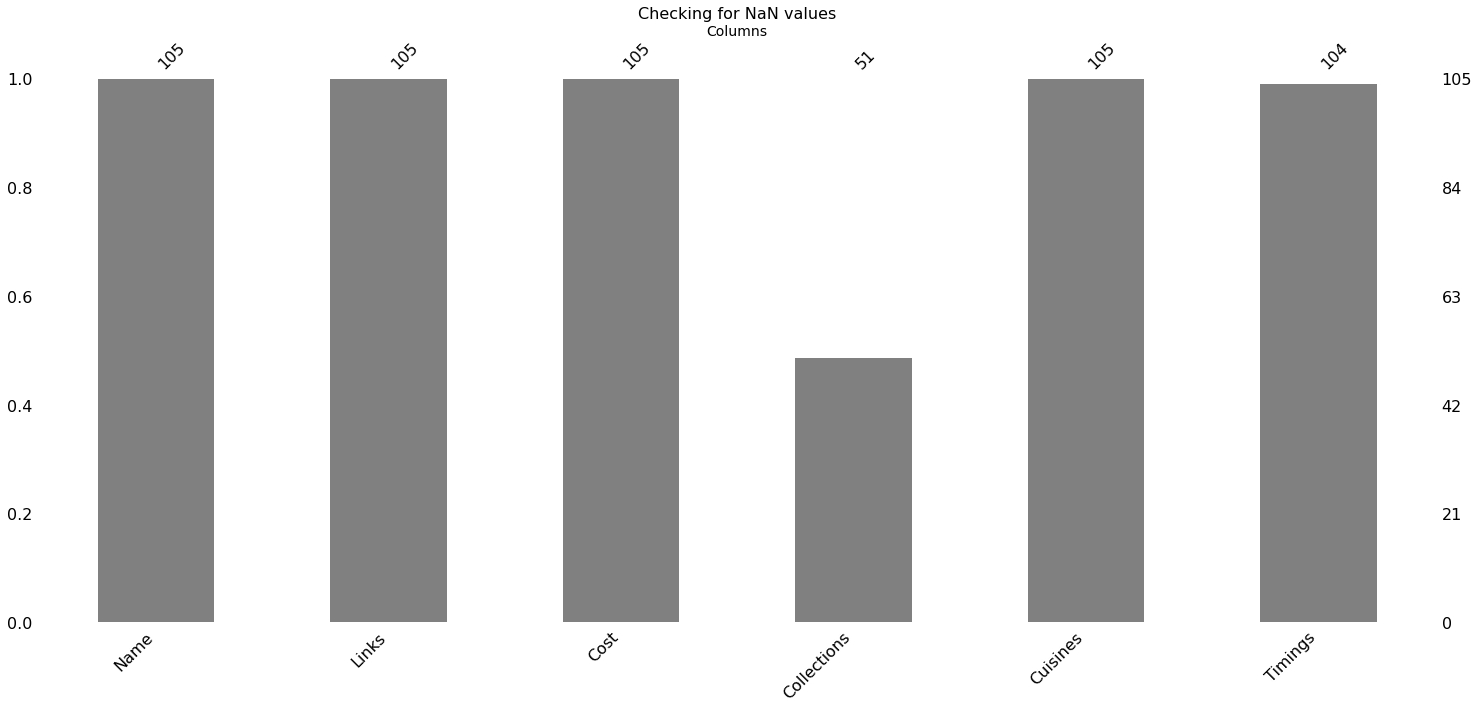

In [46]:
#checking for null values
msno.bar(names_df, color='gray')
plt.title('Checking for NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

* Collections feature is having the NaN values
* Dropping the feature

**Changing the Cost feature in th dataset**

In [47]:
#replacing , in the feature
names_df['Cost'] = names_df['Cost'].str.replace(',','').astype(int)

In [48]:
#information of datatypes
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [49]:
#number of unique values
names_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

**Filling the null value in Timings feature**

In [50]:
#finding the mode of the feature
z = names_df['Timings'].mode()[0]
#filling the null values
names_df['Timings'] = names_df['Timings'].fillna(z)
#dropping the nan values features
names_df.drop('Collections', axis=1, inplace=True)

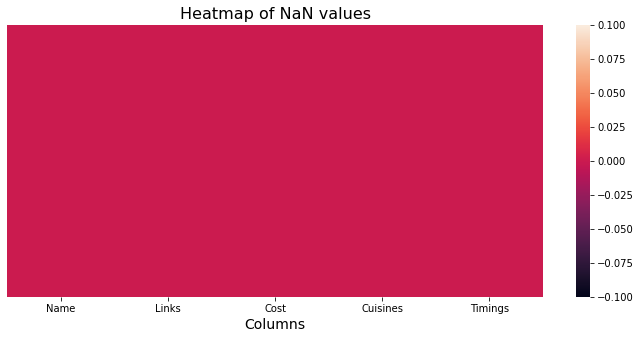

In [51]:
#heatmap of data frame
plt.figure(figsize=(12, 5))
sns.heatmap(names_df.isnull(), yticklabels=False)
plt.title('Heatmap of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [52]:
#shape of the names dataframe
names_df.shape

(105, 5)

**Analysis on Cost Feature**

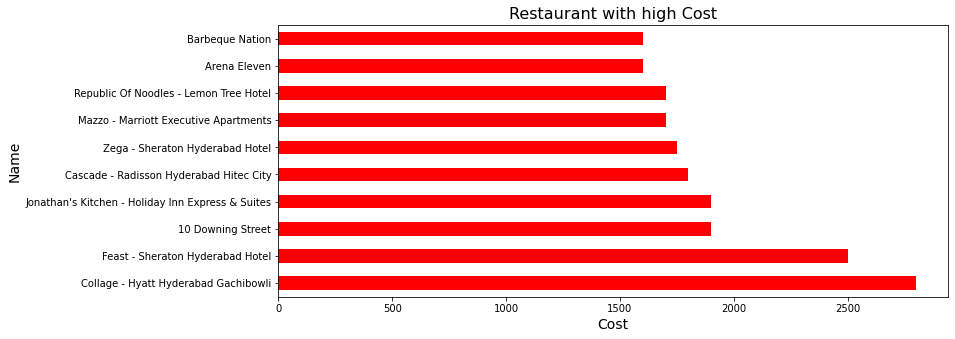

In [53]:
#finding total of costs on the restaurant names
cost = names_df.groupby(['Name'])['Cost'].sum().sort_values(ascending=False)
high_cost = cost.head(10)

#plotting of data
high_cost.plot(kind='barh', figsize=(12,5), color='red')
plt.title('Restaurant with high Cost', size=16)
plt.xlabel('Cost', size=14)
plt.ylabel('Name', size=14)
plt.show()

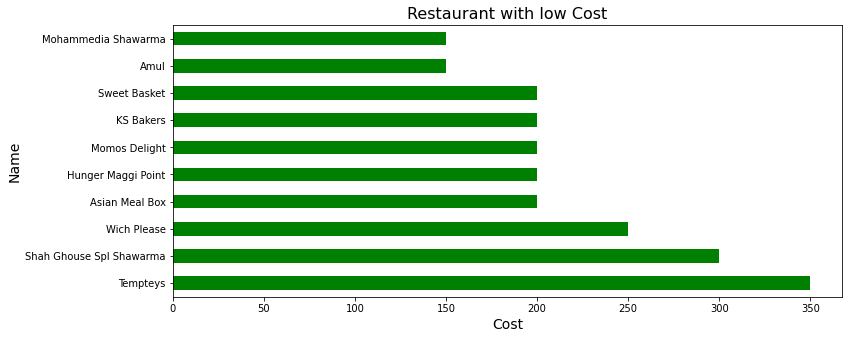

In [54]:
#plotting of the cheapest restuarants
low_cost = cost.tail(10)
low_cost.plot(kind='barh', figsize=(12,5), color='green')
plt.title('Restaurant with low Cost', size=16)
plt.xlabel('Cost', size=14)
plt.ylabel('Name', size=14)
plt.show()

**Analysis on Cuisines**

In [55]:
#dictionary of dishes in restuarant
cuisines_dict = {}
for cuisine in names_df['Cuisines']:
    for name in cuisine.split(', '):
        if name in cuisines_dict:
            cuisines_dict[name] = cuisines_dict[name]+1
        else:
            cuisines_dict[name] = 1

In [56]:
#dataframe of the variaties of disehes
cuisine_df = pd.DataFrame(cuisines_dict.items(), columns=['Cuisine', 'Count']).sort_values('Count', ascending=False)
cuisine_df.head()

,Cuisine,Count
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


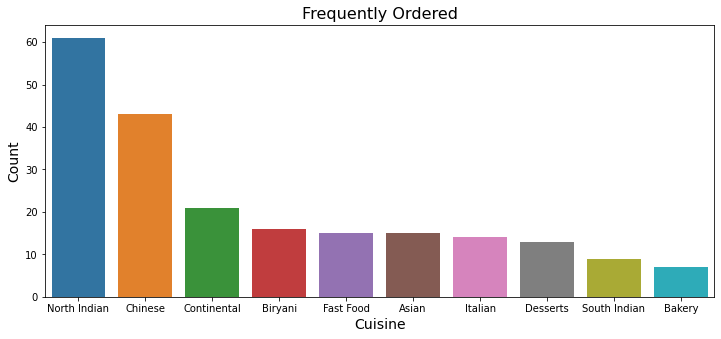

In [57]:
#plotting of cuisines data of top orders
plt.figure(figsize=(12, 5))
sns.barplot(x=cuisine_df['Cuisine'][:10], y=cuisine_df['Count'][:10])
plt.title('Frequently Ordered', size=16)
plt.xlabel('Cuisine', size=14)
plt.ylabel('Count', size=14)
plt.show()

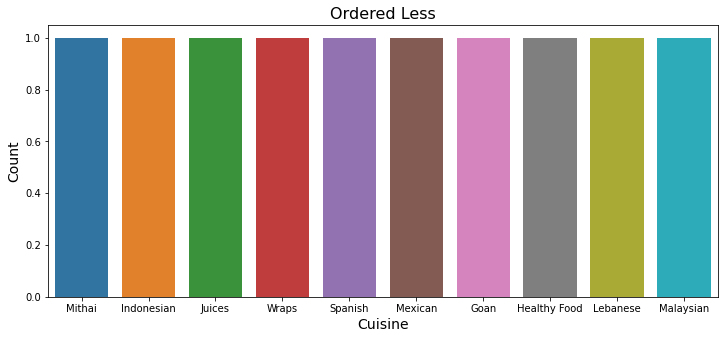

In [58]:
#plotting of cuisines data of least orders
plt.figure(figsize=(12, 5))
sns.barplot(x=cuisine_df['Cuisine'][-10:], y=cuisine_df['Count'][-10:])
plt.title('Ordered Less', size=16)
plt.xlabel('Cuisine', size=14)
plt.ylabel('Count', size=14)
plt.show()

# **Data Preparation**

In [59]:
#merging 2 dataframes
df = pd.merge(reviews_df, names_df, how='outer', right_on='Name', left_on='Restaurant')
#droppin links feature
df.drop(columns=['Links', 'Time type'], axis=1, inplace=True)
#first 5 records of merged dataframe
df.head()

,Restaurant,Reviewer,Review,Rating,Pictures,Reviewrs,Followers,Date,Month,Year,Day,Hour,Name,Cost,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,The ambience was good food was quite good had ...,5.0,0.0,1.0,2.0,25.0,5.0,2019.0,Saturday,15.0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening Se...,5.0,0.0,3.0,2.0,25.0,5.0,2019.0,Saturday,14.0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,A must try great food great ambience Thnx for ...,5.0,0.0,2.0,3.0,24.0,5.0,2019.0,Friday,22.0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy Only becau...,5.0,0.0,1.0,1.0,24.0,5.0,2019.0,Friday,22.0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,Food is goodwe ordered Kodi drumsticks and bas...,5.0,0.0,3.0,2.0,24.0,5.0,2019.0,Friday,21.0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


# **Model Implementation**

In [60]:
#importing libraries required for recomendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import sigmoid_kernel

In [61]:
#changing the index of the dataframe
df.set_index('Name', inplace=True)
#series of indices
indices = pd.Series(df.index)
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(reviews_df['Review'])

**Linear Kernel**

In [62]:
#calculating the linear kernel
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [63]:
#function of recomendatation system
def recommend(name, cosine_similarities = cosine_similarities):
    
    #list to put top 10 restaurants
    recommend_restaurant = []
    #index of the hotel entered
    idx = indices[indices == name].index[0]
    #restaurants with a similar cosine value
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    #top 30 restaurant indexes with a similar cosine value
    top30_indexes = list(score_series.iloc[0:30].index)
    #top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df.index)[each])
    
    #creating a new data set of similar restaurants
    rec_df = pd.DataFrame(columns=['Cuisines', 'Rating', 'Cost', 'Timings'])
    #top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        rec_df = rec_df.append(pd.DataFrame(df[['Cuisines','Rating', 'Cost', 'Timings']][df.index == each].sample()))
    
    #dropping the same named restaurants and sort only the top 10 by the highest rating
    rec_df = rec_df.drop_duplicates(subset=['Cuisines','Rating', 'Cost'], keep=False)
    rec_df = rec_df.sort_values(by='Rating', ascending=False).head(10)
    
    print(f'TOP 10 RESTAURANTS LIKE {name} WITH SIMILAR REVIEWS:')
    return rec_df

In [64]:
#evaluating the function with example
df[df.index=='Pista House'].head(1)

,Restaurant,Reviewer,Review,Rating,Pictures,Reviewrs,Followers,Date,Month,Year,Day,Hour,Cost,Cuisines,Timings
Name,,,,,,,,,,,,,,,
Pista House,Pista House,Moonis Ahmed,Living in Manikonda this has been our goto pla...,4.0,0.0,160.0,754.0,24.0,5.0,2019.0,Friday,19.0,1000,"Bakery, North Indian, Mughlai, Juices, Chinese",11 AM to 12 Midnight


In [65]:
#top recomendatations on the example
recommend('Pista House')

TOP 10 RESTAURANTS LIKE Pista House WITH SIMILAR REVIEWS:


,Cuisines,Rating,Cost,Timings
Hitech Bawarchi Food Zone,"Biryani, North Indian, Chinese",5.0,500,12 Noon to 11 PM
The Fisherman's Wharf,"Seafood, Goan, North Indian, Continental, Asian",5.0,1500,"12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."
Kritunga Restaurant,"Andhra, Biryani, Hyderabadi, North Indian",5.0,500,"12 Noon to 4 PM, 7 PM to 11 PM"
Shah Ghouse Spl Shawarma,Lebanese,5.0,300,12 Noon to 12 Midnight
Paradise,"Biryani, North Indian, Chinese",5.0,800,11 AM to 11 PM
Behrouz Biryani,"Mughlai, Biryani",5.0,600,10 AM to 1 AM
Marsala Food Company,"Arabian, North Indian, Chinese",4.0,700,"12noon to 4pm, 7pm to 12midnight (Mon-Sun)"
Royal Spicy Restaurant,"North Indian, South Indian",4.0,700,10:30 AM to 11 PM
Marsala Food Company,"Arabian, North Indian, Chinese",3.0,700,"12noon to 4pm, 7pm to 12midnight (Mon-Sun)"
Behrouz Biryani,"Mughlai, Biryani",3.0,600,10 AM to 1 AM


In [66]:
#top recomendatations on the example
recommend('Paradise')

TOP 10 RESTAURANTS LIKE Paradise WITH SIMILAR REVIEWS:


,Cuisines,Rating,Cost,Timings
Karachi Bakery,"Bakery, Fast Food, Desserts",5.0,500,10 AM to 10 PM
Khaan Saab,"North Indian, Mughlai",5.0,1100,"12 Noon to 3:30 PM, 7 PM to 11:30 PM"
Biryanis And More,"North Indian, Biryani, Chinese",5.0,500,11 AM to 11 PM
Al Saba Restaurant,"North Indian, Chinese, Seafood, Biryani, Hyder...",5.0,750,6 AM to 11:30 PM
Owm Nom Nom,"Chinese, Biryani, Andhra, North Indian",5.0,900,12Noon to 11:30PM (Mon-Sun)
Mohammedia Shawarma,"Street Food, Arabian",5.0,150,1 PM to 1 AM
Shree Santosh Dhaba Family Restaurant,"North Indian, Chinese, Fast Food",5.0,500,11 AM to 11:30 PM
Paradise,"Biryani, North Indian, Chinese",4.0,800,11 AM to 11 PM
Hyderabad Chefs,"North Indian, Chinese",4.0,600,12 Noon to 10:30 PM
Ulavacharu,"Andhra, North Indian, Chinese",4.0,1400,12 Noon to 11:30 PM


**Sigmoid Kernel**

In [67]:
#calculating the sigmoid kernal
sig = sigmoid_kernel(tfidf_matrix, tfidf_matrix)

In [68]:
#function of recomendatation system
def recommend(name, sig = sig):
    
    #list to put top 10 restaurants
    recommend_restaurant = []
    #index of the hotel entered
    idx = indices[indices == name].index[0]
    #restaurants with a similar cosine value
    score_series = pd.Series(sig[idx]).sort_values(ascending=False)
    #top 30 restaurant indexes with a similar cosine value
    top30_indexes = list(score_series.iloc[0:30].index)
    #top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df.index)[each])
    
    #creating a new data set of similar restaurants
    rec_df = pd.DataFrame(columns=['Cuisines', 'Rating', 'Cost', 'Timings'])
    #top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        rec_df = rec_df.append(pd.DataFrame(df[['Cuisines','Rating', 'Cost', 'Timings']][df.index == each].sample()))
    
    #dropping the same named restaurants and sort only the top 10 by the highest rating
    rec_df = rec_df.drop_duplicates(subset=['Cuisines','Rating', 'Cost'], keep=False)
    rec_df = rec_df.sort_values(by='Rating', ascending=False).head(10)
    
    print(f'TOP 10 RESTAURANTS LIKE {name} WITH SIMILAR REVIEWS:')
    return rec_df

In [69]:
#evaluating the function with example
df[df.index=='Paradise'].head(1)

,Restaurant,Reviewer,Review,Rating,Pictures,Reviewrs,Followers,Date,Month,Year,Day,Hour,Cost,Cuisines,Timings
Name,,,,,,,,,,,,,,,
Paradise,Paradise,Subodh Deshmukh,Paradise Biryani is really good service also g...,5.0,0.0,1.0,1.0,25.0,5.0,2019.0,Saturday,16.0,800,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [70]:
#top recomendatations on the example
recommend('Paradise')

TOP 10 RESTAURANTS LIKE Paradise WITH SIMILAR REVIEWS:


,Cuisines,Rating,Cost,Timings
Hotel Zara Hi-Fi,"Chinese, North Indian",5.0,400,11:30 AM to 1 AM
Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",5.0,800,12 Noon to 2 AM
Hitech Bawarchi Food Zone,"Biryani, North Indian, Chinese",5.0,500,12 Noon to 11 PM
Udipi's Upahar,"South Indian, North Indian, Chinese",5.0,500,6 AM to 10:30 PM
Shah Ghouse Spl Shawarma,Lebanese,5.0,300,12 Noon to 12 Midnight
Amul,"Ice Cream, Desserts",5.0,150,10 AM to 5 AM
Shree Santosh Dhaba Family Restaurant,"North Indian, Chinese, Fast Food",5.0,500,11 AM to 11:30 PM
Aromas@11SIX,"North Indian, Chinese, Mughlai, Biryani",5.0,750,11:30 AM to 12 Midnight
Mohammedia Shawarma,"Street Food, Arabian",5.0,150,1 PM to 1 AM
Hyderabad Chefs,"North Indian, Chinese",4.0,600,12 Noon to 10:30 PM


In [71]:
#top recomendatations on the example
recommend('Pista House')

TOP 10 RESTAURANTS LIKE Pista House WITH SIMILAR REVIEWS:


,Cuisines,Rating,Cost,Timings
The Fisherman's Wharf,"Seafood, Goan, North Indian, Continental, Asian",5.0,1500,"12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."
Pakwaan Grand,"North Indian, Chinese, Biryani",5.0,400,12 Noon to 11 PM
Hyderabad Chefs,"North Indian, Chinese",5.0,600,12 Noon to 10:30 PM
Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",5.0,800,12 Noon to 2 AM
Owm Nom Nom,"Chinese, Biryani, Andhra, North Indian",5.0,900,12Noon to 11:30PM (Mon-Sun)
Pista House,"Bakery, North Indian, Mughlai, Juices, Chinese",4.0,1000,11 AM to 12 Midnight
Marsala Food Company,"Arabian, North Indian, Chinese",4.0,700,"12noon to 4pm, 7pm to 12midnight (Mon-Sun)"
Royal Spicy Restaurant,"North Indian, South Indian",4.0,700,10:30 AM to 11 PM
Banana Leaf Multicuisine Restaurant,"Biryani, South Indian, North Indian, Chinese, ...",4.0,700,"12:30 PM to 3:30 PM, 7 PM to 10:40 PM"
Pakwaan Grand,"North Indian, Chinese, Biryani",4.0,400,12 Noon to 11 PM


# **Conclusion**

* Among all the years we have more orders in the year 2018.

* We have more orders in the month of May and less in the month of June.

* Restaurants are having more demand during weekends.

* We have more orders from 12 - 4pm at noon and from 8 - 11pm at night.

* Absolute Barbecues is ranked first and Hotel Zara Hi-Fi is ranked last on the basis of ratings given by the users.

* Pista House is having most of the followers and Shree Santosh Dhaba Family 

* Restaurant is having less number of followers.

* We have more followers than reviewers.

* Good, good, nice, very good and excellent are the words mostly used by the reviewers in writing reviews.

* College Hyatt Hyderabad Gachibowli is the restaurant with high costs and Mohammedia Shawarma is the restaurant with cheap dishes.

* North Indian varieties are commonly ordered and Malaysian is the least.

* Content based recommendation system was used to train the model.
